In [12]:
import pandas as pd
import seaborn as sns

In [13]:
df1 = pd.read_csv('NODES1-4_CLIENTS-6_N-10_L-10_S-1200_20240625_203533.csv')
df1.loc[:, 'node'] = 'Node 1'
df2 = pd.read_csv('NODES2-4_CLIENTS-6_N-10_L-10_S-1200_20240625_203533.csv')
df2.loc[:, 'node'] = 'Node 2'
df3 = pd.read_csv('NODES3-4_CLIENTS-6_N-10_L-10_S-1200_20240625_203533.csv')
df3.loc[:, 'node'] = 'Node 3'
df4 = pd.read_csv('NODES4-4_CLIENTS-6_N-10_L-10_S-1200_20240625_203533.csv')
df4.loc[:, 'node'] = 'Node 4'

In [14]:
df = pd.concat([df1, df2, df3, df4])

In [15]:
df

,timestamp,node_stack_messages_processed_per_sec,node_stack_messages_processed_count_per_sec,min_node_stack_messages_processed,lo_node_stack_messages_processed,avg_node_stack_messages_processed,hi_node_stack_messages_processed,max_node_stack_messages_processed,client_stack_messages_processed_per_sec,client_stack_messages_processed_count_per_sec,...,max_storage_bls_bft_readers,max_storage_bls_bft_tables_num,max_storage_bls_bft_tables_size,max_storage_seq_no_readers,max_storage_seq_no_tables_num,max_storage_seq_no_tables_size,max_storage_metrics_readers,max_storage_metrics_tables_num,max_storage_metrics_tables_size,node
0,2024-06-25 19:18:00,0.550000,47.516667,0.0,0.011246,0.011575,0.181507,6.0,0.000000,47.516667,...,0,0,720.0,0.0,0,720.0,0,0,28840.0,Node 1
1,2024-06-25 19:19:00,4.850000,95.933333,0.0,0.049738,0.050556,0.971743,57.0,2.950000,95.933333,...,0,0,720.0,0.0,0,720.0,0,0,139232.0,Node 1
2,2024-06-25 19:20:00,408.533333,29.966667,0.0,12.393680,13.632925,103.294611,1000.0,131.433333,29.966667,...,0,0,12752.0,0.0,0,1096968.0,0,0,294664.0,Node 1
3,2024-06-25 19:21:00,414.700000,8.666667,0.0,38.117400,47.850000,241.515527,1000.0,137.400000,8.666667,...,0,0,18184.0,0.0,0,3152656.0,0,0,424440.0,Node 1
4,2024-06-25 19:22:00,336.183333,6.416667,0.0,41.300292,52.392208,253.009555,1000.0,111.383333,6.416667,...,0,0,22560.0,0.0,0,4832536.0,0,0,527888.0,Node 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2024-06-25 20:31:00,0.000000,94.583333,0.0,0.000000,0.000000,0.000000,0.0,0.000000,94.583333,...,0,0,613016.0,398072.0,0,55159376.0,0,0,9801384.0,Node 4
74,2024-06-25 20:32:00,0.000000,94.550000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,94.550000,...,0,0,613016.0,398072.0,0,55159376.0,0,0,9912080.0,Node 4
75,2024-06-25 20:33:00,0.000000,94.566667,0.0,0.000000,0.000000,0.000000,0.0,0.000000,94.566667,...,0,0,613016.0,398072.0,0,55159376.0,0,0,10022688.0,Node 4
76,2024-06-25 20:34:00,0.100000,94.583333,0.0,0.001043,0.001057,0.080690,6.0,0.000000,94.583333,...,0,0,614096.0,398072.0,0,55159376.0,0,0,10136704.0,Node 4


In [16]:
melted_df = pd.melt(df.loc[:, ['timestamp', 'node', 'avg_monitor_avg_latency']], ['timestamp', 'node'])
melted_df.loc[melted_df['variable'] == 'avg_monitor_avg_latency', 'variable'] = 'Avg. Monitor Avg. Latency'
# melted_df.loc[melted_df['variable'] == 'avg_backup_monitor_avg_latency', 'variable'] = 'Avg. Backup Monitor Avg. Latency'

In [17]:
melted_df

,timestamp,node,variable,value
0,2024-06-25 19:18:00,Node 1,Avg. Monitor Avg. Latency,0.000000
1,2024-06-25 19:19:00,Node 1,Avg. Monitor Avg. Latency,1.685901
2,2024-06-25 19:20:00,Node 1,Avg. Monitor Avg. Latency,7.080478
3,2024-06-25 19:21:00,Node 1,Avg. Monitor Avg. Latency,11.025027
4,2024-06-25 19:22:00,Node 1,Avg. Monitor Avg. Latency,11.241216
...,...,...,...,...
307,2024-06-25 20:31:00,Node 4,Avg. Monitor Avg. Latency,0.000000
308,2024-06-25 20:32:00,Node 4,Avg. Monitor Avg. Latency,0.000000
309,2024-06-25 20:33:00,Node 4,Avg. Monitor Avg. Latency,0.000000
310,2024-06-25 20:34:00,Node 4,Avg. Monitor Avg. Latency,0.000000


/var/folders/36/vgfdp0zx6qg0p5pyjh23j0180000gn/T/ipykernel_73022/1563426340.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)


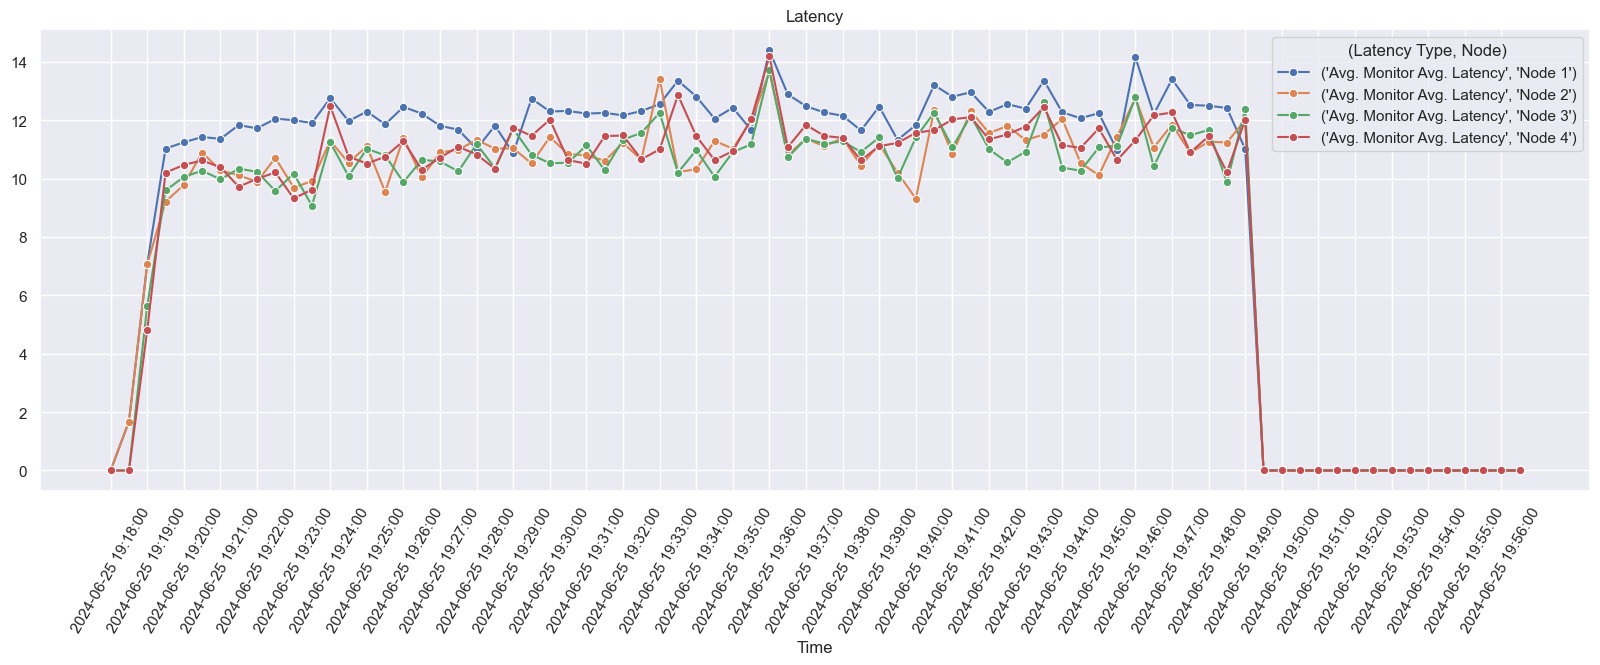

In [18]:
sns.set_theme(rc={'figure.figsize':(20, 6)})
plot = sns.lineplot(data=melted_df, x='timestamp', y='value', hue=melted_df.loc[:, ['variable', 'node']].apply(tuple, axis=1), legend=True, marker="o")
_ = plot.legend(title='(Latency Type, Node)')
_ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
_ = plot.set(xlabel='Time', ylabel='')
_ = plot.set_xticks(plot.get_xticks()[::2])
_ = plot.set_title('Latency')

In [19]:
melted_df = pd.melt(df.loc[:, ['timestamp', 'node', 'avg_backup_monitor_avg_latency']], ['timestamp', 'node'])
melted_df.loc[melted_df['variable'] == 'avg_backup_monitor_avg_latency', 'variable'] = 'Avg. Backup Monitor Avg. Latency'

/var/folders/36/vgfdp0zx6qg0p5pyjh23j0180000gn/T/ipykernel_73022/1563426340.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)


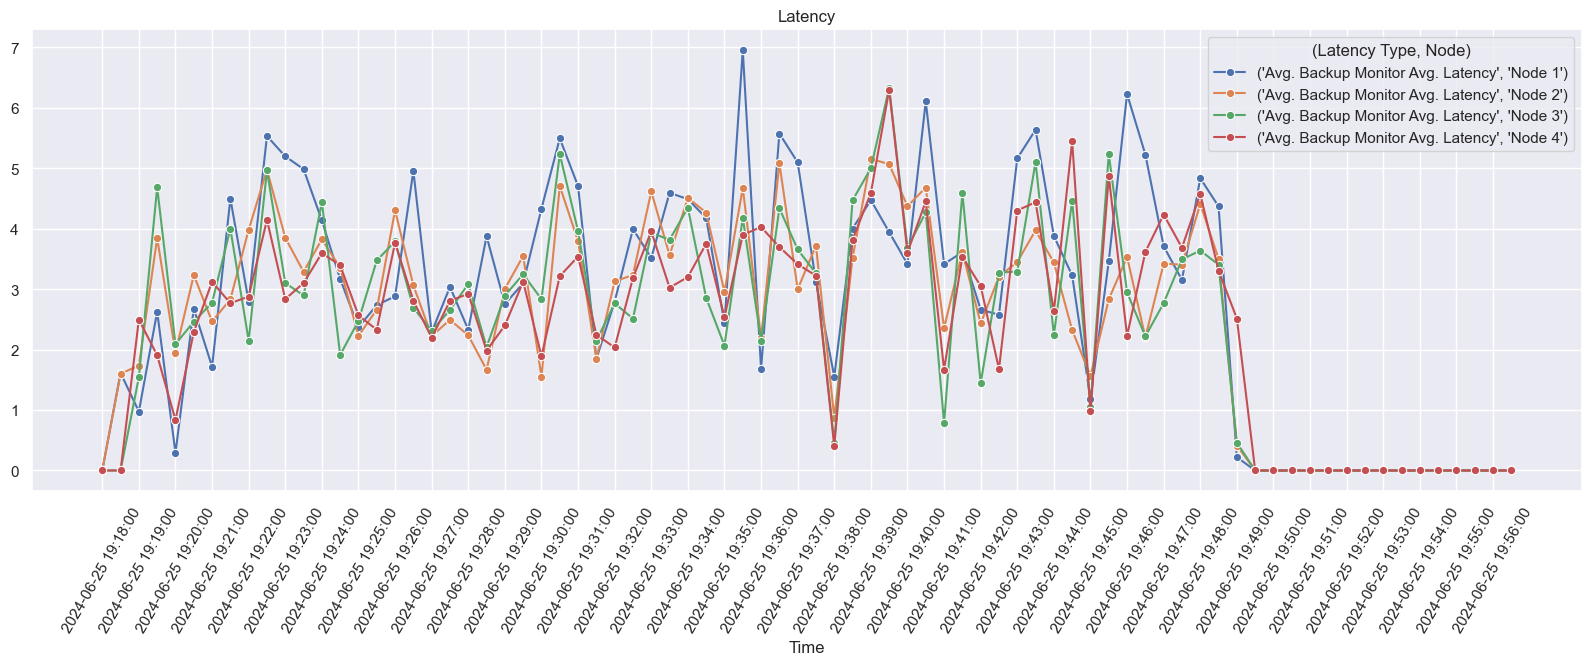

In [20]:
sns.set_theme(rc={'figure.figsize':(20, 6)})
plot = sns.lineplot(data=melted_df, x='timestamp', y='value', hue=melted_df.loc[:, ['variable', 'node']].apply(tuple, axis=1), legend=True, marker="o")
_ = plot.legend(title='(Latency Type, Node)')
_ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
_ = plot.set(xlabel='Time', ylabel='')
_ = plot.set_xticks(plot.get_xticks()[::2])
_ = plot.set_title('Latency')

In [21]:
melted_df = pd.melt(df.loc[:, ['timestamp', 'node', 'client_stack_messages_processed_per_sec']], ['timestamp', 'node'])
melted_df.loc[melted_df['variable'] == 'client_stack_messages_processed_per_sec', 'variable'] = 'Client stack messages processed per sec'
# melted_df.loc[melted_df['variable'] == 'ordered_batch_size_per_sec', 'variable'] = 'Ordered batch size per sec'
melted_df

,timestamp,node,variable,value
0,2024-06-25 19:18:00,Node 1,Client stack messages processed per sec,0.000000
1,2024-06-25 19:19:00,Node 1,Client stack messages processed per sec,2.950000
2,2024-06-25 19:20:00,Node 1,Client stack messages processed per sec,131.433333
3,2024-06-25 19:21:00,Node 1,Client stack messages processed per sec,137.400000
4,2024-06-25 19:22:00,Node 1,Client stack messages processed per sec,111.383333
...,...,...,...,...
307,2024-06-25 20:31:00,Node 4,Client stack messages processed per sec,0.000000
308,2024-06-25 20:32:00,Node 4,Client stack messages processed per sec,0.000000
309,2024-06-25 20:33:00,Node 4,Client stack messages processed per sec,0.000000
310,2024-06-25 20:34:00,Node 4,Client stack messages processed per sec,0.000000


/var/folders/36/vgfdp0zx6qg0p5pyjh23j0180000gn/T/ipykernel_73022/578702494.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)


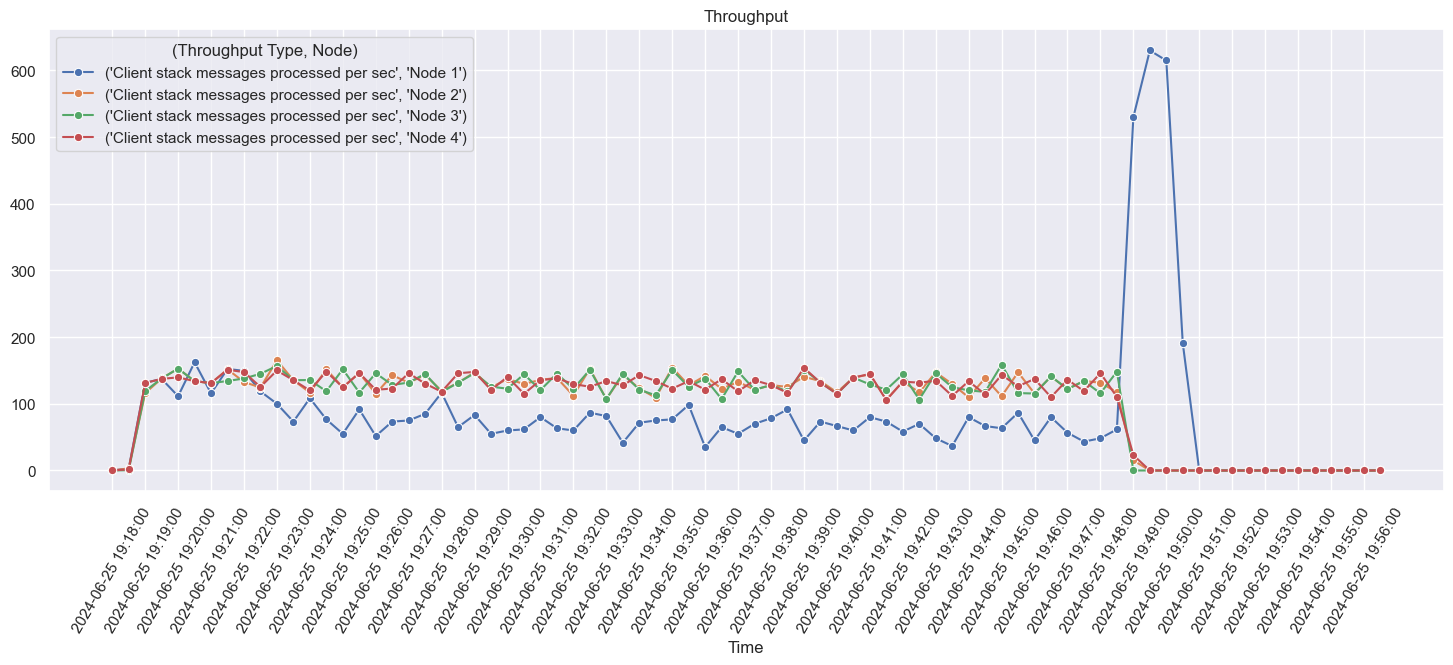

In [22]:
sns.set_theme(rc={'figure.figsize':(18, 6)})
plot = sns.lineplot(data=melted_df, x='timestamp', y='value', hue=melted_df.loc[:, ['variable', 'node']].apply(tuple, axis=1), legend=True, marker="o")
_ = plot.legend(title='(Throughput Type, Node)')
_ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
_ = plot.set(xlabel='Time', ylabel='')
_ = plot.set_xticks(plot.get_xticks()[::2])
_ = plot.set_title('Throughput')

In [23]:
melted_df = pd.melt(df.loc[:, ['timestamp', 'node', 'ordered_batch_size_per_sec']], ['timestamp', 'node'])
melted_df.loc[melted_df['variable'] == 'ordered_batch_size_per_sec', 'variable'] = 'Ordered batch size per sec'

/var/folders/36/vgfdp0zx6qg0p5pyjh23j0180000gn/T/ipykernel_73022/578702494.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)


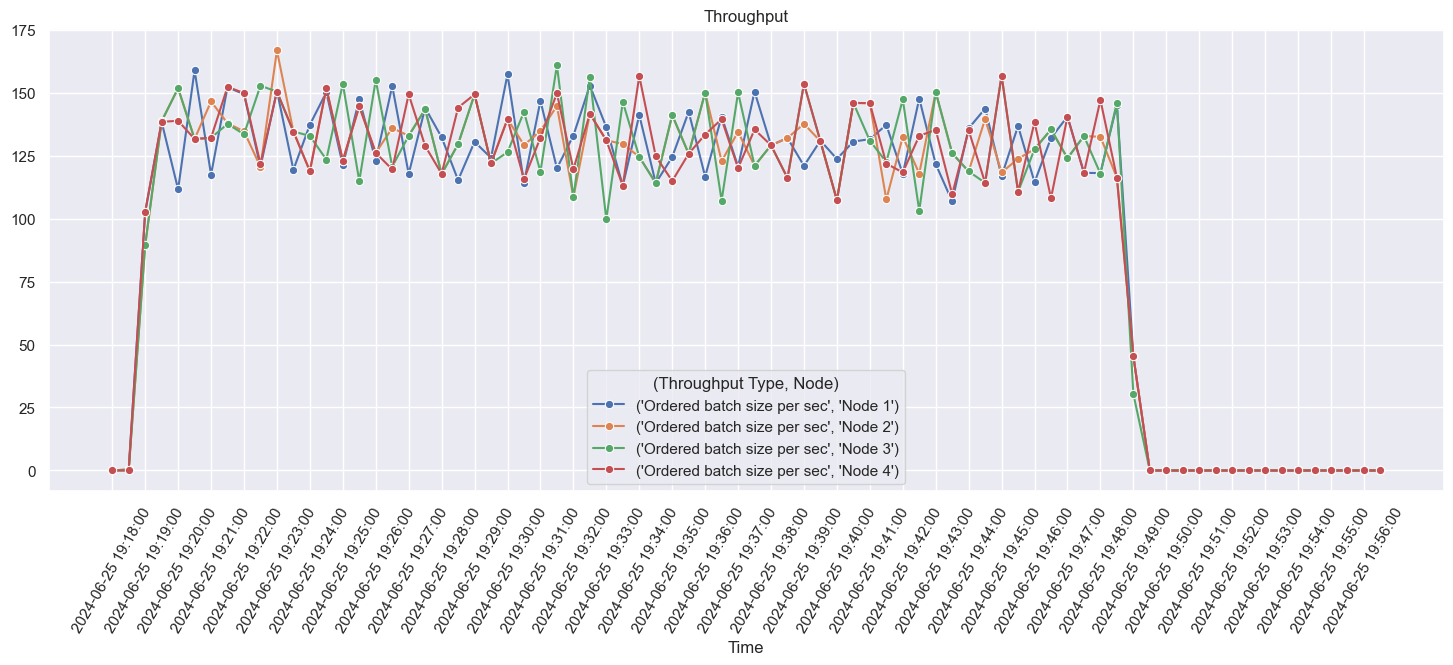

In [24]:
sns.set_theme(rc={'figure.figsize':(18, 6)})
plot = sns.lineplot(data=melted_df, x='timestamp', y='value', hue=melted_df.loc[:, ['variable', 'node']].apply(tuple, axis=1), legend=True, marker="o")
_ = plot.legend(title='(Throughput Type, Node)')
_ = plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
_ = plot.set(xlabel='Time', ylabel='')
_ = plot.set_xticks(plot.get_xticks()[::2])
_ = plot.set_title('Throughput')